# An fMRI study of composition in noun and verb phrases
### Bonnasse-Gahot, Bemis, Perez-Guevara, Dehaene, Pallier
Figure whole-brain, for the incremental model. (Re)producing Fig. 5.

In [1]:
import numpy as np
import pandas as pd

import os.path as op

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import nibabel as nib
from nilearn import plotting
from nistats.thresholding import map_threshold

import simpcomp as sc

In [2]:
sc.make_dir(sc.figures_folder)

In [3]:
fig_filename = op.join(sc.figures_folder, 'model-incremental_summary_group.pdf')

In [4]:
contrast_folder = op.join(sc.model_incremental_folder, 'contrasts')

In [5]:
import scipy.stats as stats
z_thsld_1 = stats.norm.ppf(1-0.01)
z_thsld_2 = stats.norm.ppf(1-0.001)

alpha = 0.01
cluster_threshold = 100

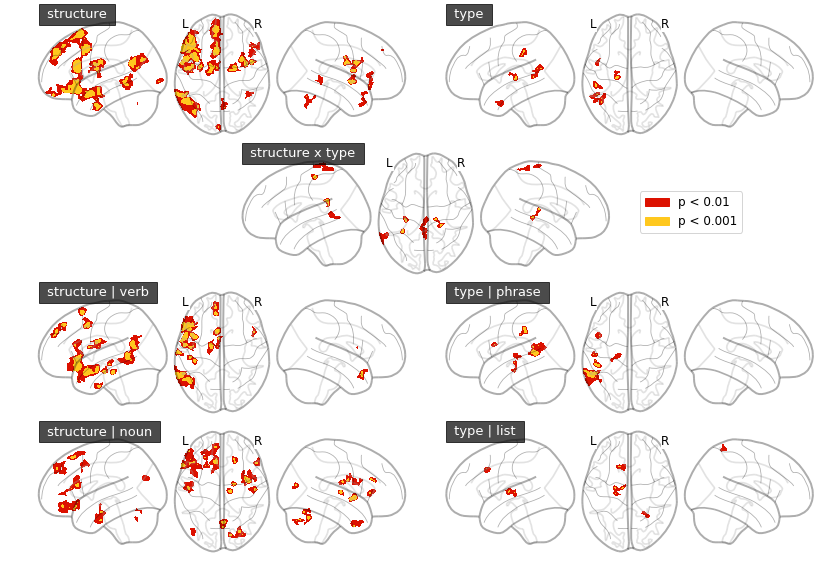

In [6]:
vmin = 0
vmax = 5

red = np.array([220/255, 17/255, 0/255, 1])
yellow = np.array([255/255, 200/255, 30/255, 1])

cmap = np.zeros((256,4))
cmap[:] = red
cmap[int((.5+z_thsld_2/(2*vmax))*256):] = yellow
cmap = ListedColormap(cmap)

# title properties
x = 0.02
ha = 'left'

height_subplot = 3.5

fh = plt.figure()
fh.set_size_inches(14, 10)

gs = GridSpec(4, 4)
gs.update(hspace=0.1, wspace=0.2)

ax = plt.subplot(gs[0, 0:2])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('structure'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' structure ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

ax = plt.subplot(gs[0, 2:])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('type'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' type ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

ax = plt.subplot(gs[1, 1:3])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('structureXtype'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' structure x type ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

ax = plt.subplot(gs[1, 3])
red_patch = mpatches.Patch(color=red, label='p < 0.01')
yellow_patch = mpatches.Patch(color=yellow, label='p < 0.001')
ax.legend(handles=[red_patch, yellow_patch], 
          bbox_to_anchor=(0.6, 0.3), loc='lower right', 
          title='', fontsize=12, title_fontsize=12)    
ax.set_axis_off()

ax = plt.subplot(gs[2, 0:2])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('structure-verb'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' structure | verb ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

ax = plt.subplot(gs[2, 2:])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('type-phrase'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' type | phrase ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

ax = plt.subplot(gs[3, 0:2])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('structure-noun'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' structure | noun ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

ax = plt.subplot(gs[3, 2:])
zmap_filename = op.join(contrast_folder, '{}_group_zmap.nii.gz'.format('type-list'))
thresholded_map, threshold = map_threshold(
    zmap_filename, alpha=alpha, cluster_threshold=cluster_threshold)
plotting.plot_glass_brain(thresholded_map, alpha=threshold, plot_abs=False, display_mode='lzr', cmap=cmap, 
                          colorbar=False, axes=ax, vmin=vmin, vmax=vmax)
ax.set_title(' type | list ', x=x, y=0.9, fontsize=13, color='w', ha='left',
             bbox=dict(facecolor='k', alpha=0.7))

plt.show()

fh.savefig(fig_filename, bbox_inches='tight')